In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/chamodyaavishka/Desktop/Sentiment_analysis-project/artifacts/sentiment_analysis.csv')

In [3]:
data.shape

(7920, 3)

In [4]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


#### Data Processing

In [5]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [6]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7915    False
7916    False
7917    False
7918    False
7919    False
Length: 7920, dtype: bool

In [7]:
data['tweet'].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

#### Text Preprocess

In [8]:
import re
import string

# convert uppercase to lowercase
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [9]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #pregnancy test https://goo.gl/h1...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


In [10]:
# delete links marks
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))


In [11]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #pregnancy test #android #apps #...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


In [13]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [14]:
data.head()

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beaut...
1,2,0,finally a transparant silicon case thanks to ...
2,3,0,we love this would you go talk makememories un...
3,4,0,im wired i know im george i was made that way ...
4,5,1,what amazing service apple wont even talk to m...


In [15]:
# delete numbers
data['tweet'] = data['tweet'].str.replace('\d','')


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/var/folders/58/g_5xrc8j1zdckrn739h9xr2m0000gn/T/ipykernel_13244/1686340233.py:2: SyntaxWarning: invalid escape sequence '\d'
  data['tweet'] = data['tweet'].str.replace('\d','')


In [17]:
data.head(10)

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beaut...
1,2,0,finally a transparant silicon case thanks to ...
2,3,0,we love this would you go talk makememories un...
3,4,0,im wired i know im george i was made that way ...
4,5,1,what amazing service apple wont even talk to m...
5,6,1,iphone software update fucked up my phone big ...
6,7,0,happy for us instapic instadaily us sony xper...
7,8,0,new type c charger cable uk … bay amazon etsy...
8,9,0,bout to go shopping again listening to music i...
9,10,0,photo fun selfie pool water sony camera picoft...


In [18]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# remove stopwords
sw = stopwords.words("english")
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))


In [19]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
# lemmatization
lemmatizer = WordNetLemmatizer()
data['tweet'] = data['tweet'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))


In [21]:
data.head()

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beauti...
1,2,0,finally transparant silicon case thanks uncle ...
2,3,0,love would go talk makememories unplug relax i...
3,4,0,im wired know im george made way iphone cute d...
4,5,1,amazing service apple wont even talk question ...


#### Building a Vocabulary

In [22]:
from collections import Counter
vocab = Counter()

In [23]:
	
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [24]:
len(vocab)

18301

In [25]:
tokens = [key for key in vocab if vocab[key] > 10]

In [26]:
len(tokens)

1170

In [27]:
tokens

['android',
 'apps',
 'beautiful',
 'cute',
 'health',
 'igers',
 'iphoneonly',
 'iphonesia',
 'iphone',
 'finally',
 'case',
 'thanks',
 'yay',
 'sony',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphone',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amazing',
 'service',
 'apple',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'software',
 'update',
 'fucked',
 'phone',
 'big',
 'time',
 'iphones',
 'happy',
 'u',
 'instapic',
 'instadaily',
 'new',
 'type',
 'charger',
 'cable',
 'uk',
 '…',
 'amazon',
 'year',
 '2018',
 'newyear',
 'starting',
 'technology',
 'iphonex',
 'shopping',
 'listening',
 'music',
 'likeforlike',
 'photo',
 'fun',
 'selfie',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'crash',
 'every',
 'need',
 'really',
 'dropped',
 'ball',
 'design',
 'giving',
 'another',
 'crazy',
 'purchase',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'battery

In [28]:
def save_list(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_list(tokens, 'vocabulary.txt')

#### Divide Dataset

In [29]:

X = data['tweet']
y = data['label']

In [30]:
X.shape

(7920,)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
X_train.shape, X_test.shape

((6336,), (1584,))

In [33]:
X_train.head(5)

7498    let say time ios7 io go applegeek apple appleo...
74      happy sunday samsung phone smile inception whi...
7357    test number 2 accumulate follower ipad iphone ...
6784    gain follower rt must follow follow back follo...
6937    sssssttttt stilte wandeling nature netherlands...
Name: tweet, dtype: object

In [34]:
import numpy as np
vectorized_train_lst = []
for sentence in X_train:
    sentence_lst = np.zeros(len(tokens))
    for i in range(len(tokens)):
        if tokens[i] in sentence.split():
            sentence_lst[i] = 1
    vectorized_train_lst.append(sentence_lst)
X_train_new = np.asarray(vectorized_train_lst, dtype=np.float32)

In [35]:
X_train_new[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [36]:
vectorized_test_lst = []
for sentence in X_test:
    sentence_lst = np.zeros(len(tokens))
    for i in range(len(tokens)):
        if tokens[i] in sentence.split():
            sentence_lst[i] = 1
    vectorized_test_lst.append(sentence_lst)
X_test_new = np.asarray(vectorized_test_lst, dtype=np.float32)

In [37]:
X_train_new.shape

(6336, 1170)

In [38]:
X_test_new.shape

(1584, 1170)

#### Handle Imbalanced dataset

In [39]:
y_train.value_counts()

label
0    4714
1    1622
Name: count, dtype: int64

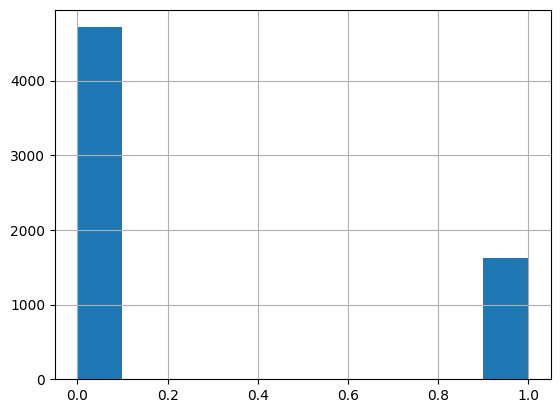

In [40]:
from matplotlib import pyplot as plt
y_train.hist()
plt.show()

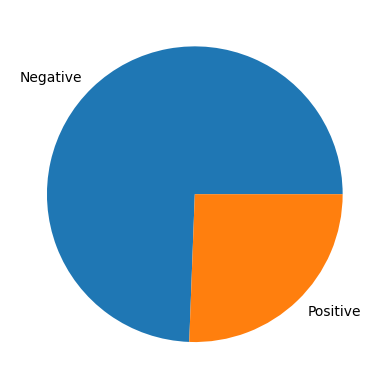

In [41]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Negative', 'Positive'])
plt.show()

In [42]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_new, y_train)
print(X_train_smote.shape, y_train_smote.shape)

(9428, 1170) (9428,)


In [43]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_new, y_train)
print(X_train_smote.shape, y_train_smote.shape)

(9428, 1170) (9428,)


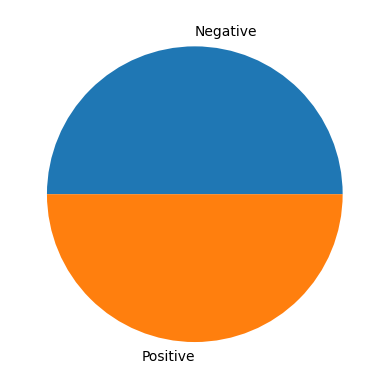

In [44]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Negative', 'Positive'])
plt.show()

#### Trainning and evaluation the model

In [45]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Functions to print scores
def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [47]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_smote, y_train_smote)

lr_y_train_pred = lr.predict(X_train_smote)

lr_y_test_pred = lr.predict(X_test_new)

training_scores(y_train_smote, lr_y_train_pred)
validation_scores(y_test, lr_y_test_pred)

Training Scores:
	Accuracy = 0.935
	Precision = 0.908
	Recall = 0.969
	F1-Score = 0.938
Testing Scores:
	Accuracy = 0.882
	Precision = 0.72
	Recall = 0.879
	F1-Score = 0.792


In [49]:
# Naive Bayes Classifier
mnb = MultinomialNB()
mnb.fit(X_train_smote, y_train_smote)

mnb_y_train_pred = mnb.predict(X_train_smote)

mnb_y_test_pred = mnb.predict(X_test_new)

training_scores(y_train_smote, mnb_y_train_pred)
validation_scores(y_test, mnb_y_test_pred)


Training Scores:
	Accuracy = 0.902
	Precision = 0.864
	Recall = 0.954
	F1-Score = 0.907
Testing Scores:
	Accuracy = 0.877
	Precision = 0.689
	Recall = 0.943
	F1-Score = 0.796


In [50]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train_smote, y_train_smote)

rf_y_train_pred = rf.predict(X_train_smote)

rf_y_test_pred = rf.predict(X_test_new)

training_scores(y_train_smote, rf_y_train_pred)
validation_scores(y_test, rf_y_test_pred)

Training Scores:
	Accuracy = 0.999
	Precision = 1.0
	Recall = 0.999
	F1-Score = 0.999
Testing Scores:
	Accuracy = 0.867
	Precision = 0.753
	Recall = 0.71
	F1-Score = 0.731


In [51]:
# Extreme Gradient Boosting Classifier
xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss')
xgb.fit(X_train_smote, y_train_smote)

xgb_y_train_pred = xgb.predict(X_train_smote)

xgb_y_test_pred = xgb.predict(X_test_new)

training_scores(y_train_smote, xgb_y_train_pred)
validation_scores(y_test, xgb_y_test_pred)

Training Scores:
	Accuracy = 0.935
	Precision = 0.921
	Recall = 0.952
	F1-Score = 0.936
Testing Scores:
	Accuracy = 0.876
	Precision = 0.73
	Recall = 0.817
	F1-Score = 0.771


In [52]:
# Support Vector Classifier
svm = SVC()
svm.fit(X_train_smote, y_train_smote)

svm_y_train_pred = svm.predict(X_train_smote)

svm_y_test_pred = svm.predict(X_test_new)

training_scores(y_train_smote, svm_y_train_pred)
validation_scores(y_test, svm_y_test_pred)

Training Scores:
	Accuracy = 0.975
	Precision = 0.955
	Recall = 0.996
	F1-Score = 0.975
Testing Scores:
	Accuracy = 0.888
	Precision = 0.749
	Recall = 0.842
	F1-Score = 0.793


In [55]:
import pickle
with open('/Users/chamodyaavishka/Desktop/Sentiment_analysis-project/statics/model/model_pkl', 'wb') as files:
    pickle.dump(rf, files)